In [2]:
import sys

PACKAGE_PARENT = '../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.imitate.torch.bcAgent import BCAgent
import bc_training_configs_extend as BCCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# load configurations
CONST = BCCONFIGS.CONST
agent_config = BCCONFIGS.agent_config
env = BCCONFIGS.env

In [4]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = BCAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
# paths = ['tmp/ppo/actor_torch_ppo', 'tmp/ppo/critic_torch_ppo']
# paths = ['tmp/ppo/actor_torch_ppo', 'tmp/ppo/critic_torch_ppo']
# paths = ['../../../PPO_baseline_data/gamma_0.99_alpha_0.0003_reward_-2.84_model_actor.pt', '../../../PPO_baseline_data/gamma_0.99_alpha_0.0003_reward_-2.84_model_critic.pt']
# path = '../../../BC_data/alpha_0.0003_loss_21317_model_bc.pt'
# path = '../../../BC_data_extend/alpha_0.0003_loss_14896_model_bc.pt'
path = '../../../BC_data_extend/alpha_0.0003_loss_7061._model_bc.pt'
agent_trained.load_model(path)


eps = 1000
base_dir_path = "./"
RENDER = False
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)




BCPolicyNet Device used: cpu
... loading model ...


100%|██████████| 1000/1000 [07:59<00:00,  2.09it/s]


average reward per episode : -1.032
average reward per episode= -1.032


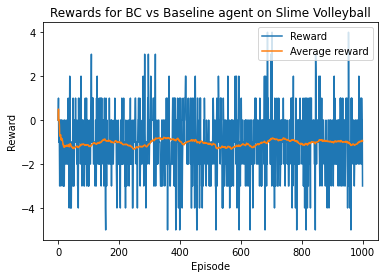

In [37]:
print("average reward per episode :", sum(rewards) / len(rewards))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.legend(loc='upper right') 
plt.title('Rewards for BC vs Baseline agent on Slime Volleyball')
plt.xlabel('Episode')
plt.ylabel('Reward')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()

In [8]:
# load training data
import numpy as np
import matplotlib.pyplot as plt
import pickle


data_path_1 = '../../../BC_data_extend/alpha_0.0003_loss_14896_data.pkl'
data_path_2 = '../../../BC_data_extend/alpha_0.0003_loss_8868._data.pkl'
data_path_3 = '../../../BC_data_extend/alpha_0.0003_loss_7632._data.pkl'
data_path_4 = '../../../BC_data_extend/alpha_0.0003_loss_7061._data.pkl'
# data_path_1 = '../../../BC_data/alpha_0.0003_loss_21317_data.pkl'
# data_path_2 = '../../../PPO_baseline_data_cont/gamma_0.99_alpha_0.0003_reward_-0.22_data.pkl'

data_paths = []
data_paths.append(data_path_1)
data_paths.append(data_path_2)
data_paths.append(data_path_3)
data_paths.append(data_path_4)



# with open(data_path_2, 'rb') as f:
#     data2 = pickle.load(f)

# print(data1.keys())
# train_losses_1 = data1['losses']
# train_rewards_2 = data2['rewards']
# train_losses = []
# train_losses.extend(train_losses_1)
# train_rewards.extend(train_rewards_2)


In [9]:
train_losses = []
for data_path in data_paths:
    with open(data_path, 'rb') as f:
        data = pickle.load(f)
    train_losses_data = data['losses']
    train_losses.extend(train_losses_data)


In [10]:
train_losses = np.array(train_losses)

print('train_losses.shape = {}'.format(train_losses.shape))
# print(train_losses)

mean_loss_per_epoch = np.mean(train_losses, axis=1)
print('mean_loss_per_epoch.shape = {}'.format(mean_loss_per_epoch.shape))

train_losses.shape = (130, 16)
mean_loss_per_epoch.shape = (130,)


6778.624053955078
average loss per epoch = 8888.475548377404


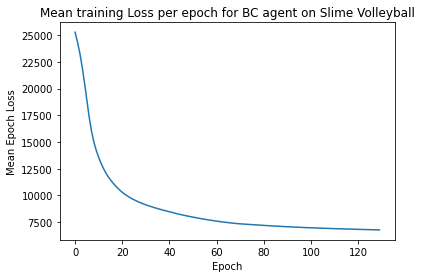

In [16]:
print(mean_loss_per_epoch[-1])
# plt.plot(mean_loss_per_epoch, label='Mean Loss')
plt.plot(mean_loss_per_epoch)
# plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.title('Mean training Loss per epoch for BC agent on Slime Volleyball')
plt.xlabel('Epoch')
plt.ylabel('Mean Epoch Loss')
print('average loss per epoch = {}'.format(np.mean(mean_loss_per_epoch)))
plt.show()

In [12]:
# Selfplay VS Selfplay
from alphaslime.evaluate.eval_agents import EvaluateGameMA
from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent

import train.selfplay.policygrad.pposp_configs_cont as PPOCONFIGS

left_CONST = PPOCONFIGS.CONST
left_agent_config = PPOCONFIGS.agent_config


agent_right = BCAgent(CONSTANTS=CONST, config=agent_config)
# agent_left = BCAgent(CONSTANTS=CONST, config=agent_config)
agent_left = PPOAgent(CONSTANTS=left_CONST, config=left_agent_config)

# load trained models
paths_right = '../../../BC_data_extend/alpha_0.0003_loss_7061._model_bc.pt'
# paths_left = '../../../BC_data_extend/alpha_0.0003_loss_14896_model_bc.pt'

act_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_actor.pt'
crt_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_critic.pt'
paths_left = [act_path, crt_path]

agent_right.load_model(paths_right)
agent_left.load_model(paths_left)


eps = 1
base_dir_path = "./"
RENDER = True
gym_evaluator = EvaluateGameMA(agent_right, agent_left, env, base_dir_path, render=RENDER, time_delay=0)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len)



ModuleNotFoundError: No module named 'train.selfplay'; 'train' is not a package

In [4]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = BCAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
# paths = ['tmp/ppo/actor_torch_ppo', 'tmp/ppo/critic_torch_ppo']
# paths = ['tmp/ppo/actor_torch_ppo', 'tmp/ppo/critic_torch_ppo']
# paths = ['../../../PPO_baseline_data/gamma_0.99_alpha_0.0003_reward_-2.84_model_actor.pt', '../../../PPO_baseline_data/gamma_0.99_alpha_0.0003_reward_-2.84_model_critic.pt']
# path = '../../../BC_data/alpha_0.0003_loss_21317_model_bc.pt'
# path = '../../../BC_data_extend/alpha_0.0003_loss_14896_model_bc.pt'
path = '../../../BC_data_extend/alpha_0.0003_loss_7061._model_bc.pt'
agent_trained.load_model(path)


eps = 1
base_dir_path = "./"
RENDER = True
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)

BCPolicyNet Device used: cpu
... loading model ...


100%|██████████| 1/1 [01:46<00:00, 106.05s/it]
